# Male and Female Difference in Top Highest Suicide Rate Countries
This code is to analyse the male and female comparison in top 5 countries with hight suicide rates

catplot (for categorical data) from Seaborn library is used for visualisation 

In [5]:
# ========= Import the packages =========
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

# Importing Customised Common Data Reader Class
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideProcessedData

In [6]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader()

# Load Suicide Rate data
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
print(suicide_rate_data)

         country         sex  80_above  70to79  60to69  50to59  40to49  \
0    Afghanistan  Both sexes      42.0    11.0     5.5     5.6     6.6   
1    Afghanistan        Male      70.4    20.9     9.8     9.3    10.5   
2    Afghanistan      Female      20.1     2.3     1.4     1.6     2.3   
3        Albania  Both sexes      16.3     8.3     6.0     7.8     9.1   
4        Albania        Male      23.2    11.9     8.1    11.4    13.5   
..           ...         ...       ...     ...     ...     ...     ...   
544       Zambia        Male     152.1    79.0    38.7    27.3    17.0   
545       Zambia      Female      31.2    26.4    16.0    11.2     6.9   
546     Zimbabwe  Both sexes     205.7    81.5    41.3    29.4    19.2   
547     Zimbabwe        Male     285.0   111.5    62.8    47.0    30.1   
548     Zimbabwe      Female     152.4    59.4    26.4    16.0     9.4   

     30to39  20to29  10to19  all_age  
0       9.2    10.2     3.1     93.2  
1      15.1    16.3     4.8    15

In [9]:
# ========= Prepare Data =========

# Find Top 5 countries of highest suicide rate in 'all_age' and "both sexes"
# And Male/ Female - Age distribution 
top_5_suicide_rate_bothsex = suicide_rate_data[(suicide_rate_data['sex'] == "Both sexes")].nlargest(5, "all_age")
#print(top_5_suicide_rate_bothsex)

suicide_rate_tidy_data_both_sex = pd.melt(suicide_rate_data, id_vars=['country', 'sex'], var_name='age',value_name='suicide_rate')
suicide_rate_separatesex = suicide_rate_tidy_data_both_sex[(suicide_rate_tidy_data_both_sex['sex'] != 'Both sexes') & (suicide_rate_tidy_data_both_sex['age'] != 'all_age' )]

# ## Get the countries names of top 5 highest suicide rate
top_5_country_names = top_5_suicide_rate_bothsex['country'].to_list()

# ## Filtering out Male/Female records belongs to the hightest countries.
top5_suicide_rate = suicide_rate_separatesex[suicide_rate_separatesex['country'].isin(top_5_country_names)]
top5_suicide_rate

,country,sex,age,suicide_rate
118,Côte d'Ivoire,Male,80_above,202.6
119,Côte d'Ivoire,Female,80_above,52.0
280,Lesotho,Male,80_above,80.8
281,Lesotho,Female,80_above,210.4
358,Nigeria,Male,80_above,130.7
...,...,...,...,...
4202,Nigeria,Female,10to19,3.7
4351,Uganda,Male,10to19,6.1
4352,Uganda,Female,10to19,4.6
4390,Zimbabwe,Male,10to19,6.4


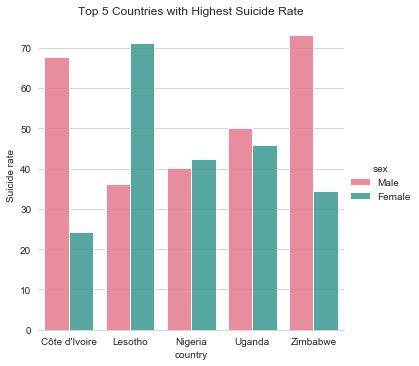

In [10]:
# ========= Plotting =========

sns.set_style("whitegrid")
gg = sns.catplot(data = top5_suicide_rate, kind="bar", x="country", y="suicide_rate",hue="sex", palette="husl", alpha=.9, height=5, ci=None)
gg.despine(left=True).set_ylabels("Suicide rate")
plt.title("Top 5 Countries with Highest Suicide Rate")
plt.show()